In [1]:
import arxivscraper as ax
import pandas as pd
import pickle
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### In this lab, we will dealing with the author network data that is publicly avaiable. This lab will be divided into 3 parts:
    
- Scrape and analyze the dataset from https://arxiv.org – this will be the network data for the lab
- Plot the Degree distribution of the authorship network in last 5 years and in last 15 years
- Visualize the authorship network


In [39]:
def scrape_data():
    scraper = ax.Scraper(category='stat', date_from='2012-01-01',date_until='2017-01-01', t=10, filters={'categories':['stat.ml', 'stat.co', 'stat.ap', 'stat.th'],
                                                                                                       'abstract':['learning']})
    output = scraper.scrape()
    cols = ('id', 'title', 'categories', 'abstract', 'doi', 'created', 'updated', 'authors')
    df = pd.DataFrame(output,columns=cols)

    print(len(df))
    pickle.dump(df, open('./data_15years_v1.pickle', 'wb'))

In [ ]:
scrape_data()

http://export.arxiv.org/oai2?verb=ListRecords&from=2012-01-01&until=2017-01-01&metadataPrefix=arXiv&set=stat
fetching up to  1000 records...
fetching up to  2000 records...
Got 503. Retrying after 10 seconds.
fetching up to  2000 records...
fetching up to  3000 records...
Got 503. Retrying after 10 seconds.
fetching up to  3000 records...
fetching up to  4000 records...
Got 503. Retrying after 10 seconds.
fetching up to  4000 records...
fetching up to  5000 records...
Got 503. Retrying after 10 seconds.
fetching up to  5000 records...
fetching up to  6000 records...
Got 503. Retrying after 10 seconds.
fetching up to  6000 records...
fetching up to  7000 records...
Got 503. Retrying after 10 seconds.
fetching up to  7000 records...
fetching up to  8000 records...
Got 503. Retrying after 10 seconds.
fetching up to  8000 records...
fetching up to  9000 records...
Got 503. Retrying after 10 seconds.
fetching up to  9000 records...
fetching up to  10000 records...
Got 503. Retrying after 10

In [2]:
data = pd.read_pickle('./data_15years_v1.pickle')

In [3]:
authorList = data['authors']
print(len(authorList))

22575


In [4]:
def createAdjacencyList(authorList):
    adjList = {}
    globalEdgeList = []
    for authors in authorList:
        edgesCurr = list(itertools.combinations(authors, 2))
        for u, v in edgesCurr:
            if u not in adjList:
                adjList[u] = []
            if v not in adjList:
                adjList[v] = []

            if (u, v) in globalEdgeList or (v, u) in globalEdgeList:
                continue
            adjList[u].append(v)
            adjList[v].append(u)
            globalEdgeList.append((u, v))

    return adjList, globalEdgeList

In [5]:
import plotly.plotly as py


In [6]:
def store_edges(globalEdgeList):
    dfEdges = pd.DataFrame()
    sources = []
    targets = []
    for u, v in globalEdgeList:
        sources.append(u)
        targets.append(v)

    dfEdges['sources'] = pd.Series(sources)
    dfEdges['targets'] = pd.Series(targets)

    return dfEdges

### Networkx tutorials

https://networkx.github.io/documentation/stable/tutorial.html#


In [7]:
def computeDegree(globalEdgeList):
#     print(globalEdgeList)
    G = nx.Graph()
    G.add_edges_from(globalEdgeList)

    degrees = G.degree()
    return degrees, G


In [8]:
def log_logPlot(data, title=''):
    value_list = []
    
    for u, deg in data:
        value_list.append(deg)
        
    sorted_X = sorted(set(value_list))
#     print(data)

    distributionX = [value_list.count(x) for x in sorted_X]
    plt.figure()
    plt.loglog(sorted_X, distributionX, 'ro', basex=2, basey=2)
    # plt.xlim([])
    plt.xlabel('Degree', size=35)
    plt.ylabel('Number of nodes', size=30)
    plt.xticks(size=30)
    plt.yticks(size=30)
    plt.title(title, size=25)
    plt.show()

In [16]:
adjList, globalEdgeList = createAdjacencyList(authorList)
# edgesDf = store_edges(globalEdgeList)
# edgesDf.to_csv('edges_5_years.csv')

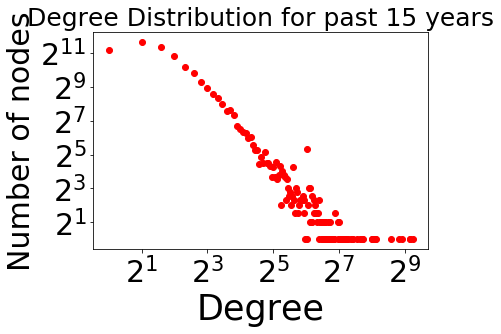

In [23]:
degreesDict, G = computeDegree(globalEdgeList)
log_logPlot(degreesDict, 'Degree Distribution for past 15 years')



/Users/anaygupta/anaconda3/envs/python3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



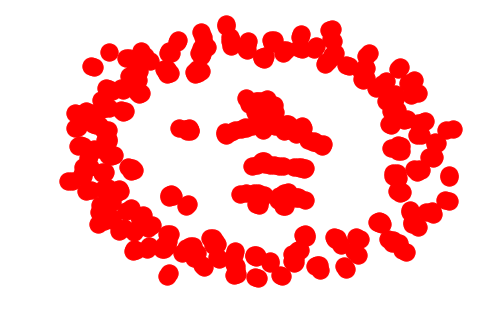

In [18]:
# print(globalEdgeList[:10])
degreesDict, G = computeDegree(globalEdgeList[:500])
nx.draw(G)
plt.show()


### Scale free networks

https://mathinsight.org/scale_free_network

## Exercise:

# Repeat the above steps with the 15 years dataset 

1. Plot the log log plot for this dataset
2. List the top 10 degree users and their degree values

In [19]:
tdict = {}
for key,value in sorted(degreesDict):
    tdict[key] = value
occs = []



In [20]:
zhou, marwala, 

NameError: name 'zhou' is not defined

In [22]:
for w in sorted(tdict, key=tdict.get, reverse=True)[:10]:
    print(w, tdict[w])

zhou 14
chen 11
wu 8
marwala 7
wellner 7
wang 7
villa 7
cottrell 6
olmedo 6
ferré 6
